**19CSE305 Machine Learning**

**Term Project**

**Box Office Prediction**
* Aashutosh G Vyas (BL.EN.U4CSE19002)
* Gayatri Sanjana Sannala (BL.EN.U4CSE19045)
* K.V.G. Rohith (BL.EN.U4CSE19073)
* Lavanya Sirisha M (BL.EN.U4CSE19076)
* Vinamratha Pattar (BL.EN.U4CSE19145)



In [ ]:
!pip install mlxtend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns 
from sklearn.linear_model import LogisticRegression 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

**Data Preprocessing**

In [ ]:
tie = pd.read_csv("tie.csv",index_col=0)
tie

,name,hot_season,tier-a-series,strong_competition
rank,,,,
0,Rogue One: A Star Wars Story,1,1,0
1,Finding Dory,1,1,0
2,Captain America: Civil War,1,1,1
3,The Secret Life of Pets,1,0,0
4,The Jungle Book (2016),0,1,1
...,...,...,...,...
160,Jane Got a Gun,0,0,0
161,The Neon Demon,1,0,1
162,Believe (2016),1,0,1


In [ ]:
movie = pd.read_csv("box_2016_trend.csv",index_col=0)
movie

,name,open_gross,open_thea,budget,runtime,MPAArating,Sci-Fi,Adventure,Action,Animation,Musical,Comedy,Fantasy,Thriller,Horror,Drama,Romance,Historical,Western,Family,Crime,Concert,Documentary,Sports,War,Director_gross,Actor_gross,studio_gross,mean_score_mtc,comment_count_mtc,trend_a_week,trend_two_week,trend_a_day
0,Rogue One: A Star Wars Story,155081681,4157,200.0,133,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.155474e+08,5.477600e+07,8400.8000,68.240000,50.0,588.760978,144.102337,1758.048514
1,Finding Dory,135060273,4305,200.0,103,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.104761e+08,6.333170e+08,8400.8000,78.878049,41.0,303.511042,130.076161,573.298635
2,Captain America: Civil War,179139142,4226,250.0,147,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.822005e+08,2.343813e+09,8400.8000,77.000000,51.0,350.723871,182.106625,519.341116
3,The Secret Life of Pets,104352905,4370,75.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.503019e+08,4.942307e+08,7358.0000,64.861111,36.0,145.010831,77.563933,283.276973
4,The Jungle Book (2016),103261464,4028,175.0,105,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.199206e+09,2.981236e+09,8400.8000,78.564103,39.0,165.244901,70.819243,236.064144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jane Got a Gun,835572,1210,25.0,98,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.297617e+08,2.911713e+09,1569.5000,50.000000,3.0,4.428571,0.714286,14.000000
161,The Neon Demon,589014,783,7.0,117,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4.059610e+07,7.067092e+08,34.7000,53.076923,39.0,24.142857,10.571429,47.000000
162,Believe (2016),477387,638,3.5,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,85.7590,30.000000,1.0,NaN,NaN,NaN
163,The Bronze,386328,1167,3.5,108,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8.244771e+08,314.2000,45.791667,24.0,14.714286,3.714286,32.000000


In [ ]:
#merging the two datasets
movie_tie = pd.merge(movie, tie,  how='left', left_on=['name'], right_on = ['name'])
movie_tie

,name,open_gross,open_thea,budget,runtime,MPAArating,Sci-Fi,Adventure,Action,Animation,Musical,Comedy,Fantasy,Thriller,Horror,Drama,Romance,Historical,Western,Family,Crime,Concert,Documentary,Sports,War,Director_gross,Actor_gross,studio_gross,mean_score_mtc,comment_count_mtc,trend_a_week,trend_two_week,trend_a_day,hot_season,tier-a-series,strong_competition
0,Rogue One: A Star Wars Story,155081681,4157,200.0,133,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.155474e+08,5.477600e+07,8400.8000,68.240000,50.0,588.760978,144.102337,1758.048514,1,1,0
1,Finding Dory,135060273,4305,200.0,103,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.104761e+08,6.333170e+08,8400.8000,78.878049,41.0,303.511042,130.076161,573.298635,1,1,0
2,Captain America: Civil War,179139142,4226,250.0,147,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.822005e+08,2.343813e+09,8400.8000,77.000000,51.0,350.723871,182.106625,519.341116,1,1,1
3,The Secret Life of Pets,104352905,4370,75.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.503019e+08,4.942307e+08,7358.0000,64.861111,36.0,145.010831,77.563933,283.276973,1,0,0
4,The Jungle Book (2016),103261464,4028,175.0,105,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.199206e+09,2.981236e+09,8400.8000,78.564103,39.0,165.244901,70.819243,236.064144,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jane Got a Gun,835572,1210,25.0,98,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.297617e+08,2.911713e+09,1569.5000,50.000000,3.0,4.428571,0.714286,14.000000,0,0,0
161,The Neon Demon,589014,783,7.0,117,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4.059610e+07,7.067092e+08,34.7000,53.076923,39.0,24.142857,10.571429,47.000000,1,0,1
162,Believe (2016),477387,638,3.5,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,85.7590,30.000000,1.0,NaN,NaN,NaN,1,0,1
163,The Bronze,386328,1167,3.5,108,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8.244771e+08,314.2000,45.791667,24.0,14.714286,3.714286,32.000000,0,0,1


In [ ]:
movie_tie.to_csv("box2016_mtc_trend_tie.csv")

In [ ]:
movie = pd.read_csv("box2016_mtc_trend_tie.csv",index_col=0)

In [ ]:
movie

,name,open_gross,open_thea,budget,runtime,MPAArating,Sci-Fi,Adventure,Action,Animation,Musical,Comedy,Fantasy,Thriller,Horror,Drama,Romance,Historical,Western,Family,Crime,Concert,Documentary,Sports,War,Director_gross,Actor_gross,studio_gross,mean_score_mtc,comment_count_mtc,trend_a_week,trend_two_week,trend_a_day,hot_season,tier-a-series,strong_competition
0,Rogue One: A Star Wars Story,155081681,4157,200.0,133,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.155474e+08,5.477600e+07,8400.8000,68.240000,50.0,588.760978,144.102337,1758.048514,1,1,0
1,Finding Dory,135060273,4305,200.0,103,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.104761e+08,6.333170e+08,8400.8000,78.878049,41.0,303.511042,130.076161,573.298635,1,1,0
2,Captain America: Civil War,179139142,4226,250.0,147,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.822005e+08,2.343813e+09,8400.8000,77.000000,51.0,350.723871,182.106625,519.341116,1,1,1
3,The Secret Life of Pets,104352905,4370,75.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.503019e+08,4.942307e+08,7358.0000,64.861111,36.0,145.010831,77.563933,283.276973,1,0,0
4,The Jungle Book (2016),103261464,4028,175.0,105,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.199206e+09,2.981236e+09,8400.8000,78.564103,39.0,165.244901,70.819243,236.064144,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jane Got a Gun,835572,1210,25.0,98,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.297617e+08,2.911713e+09,1569.5000,50.000000,3.0,4.428571,0.714286,14.000000,0,0,0
161,The Neon Demon,589014,783,7.0,117,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4.059610e+07,7.067092e+08,34.7000,53.076923,39.0,24.142857,10.571429,47.000000,1,0,1
162,Believe (2016),477387,638,3.5,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,85.7590,30.000000,1.0,NaN,NaN,NaN,1,0,1
163,The Bronze,386328,1167,3.5,108,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,8.244771e+08,314.2000,45.791667,24.0,14.714286,3.714286,32.000000,0,0,1


**Relation Between Features**

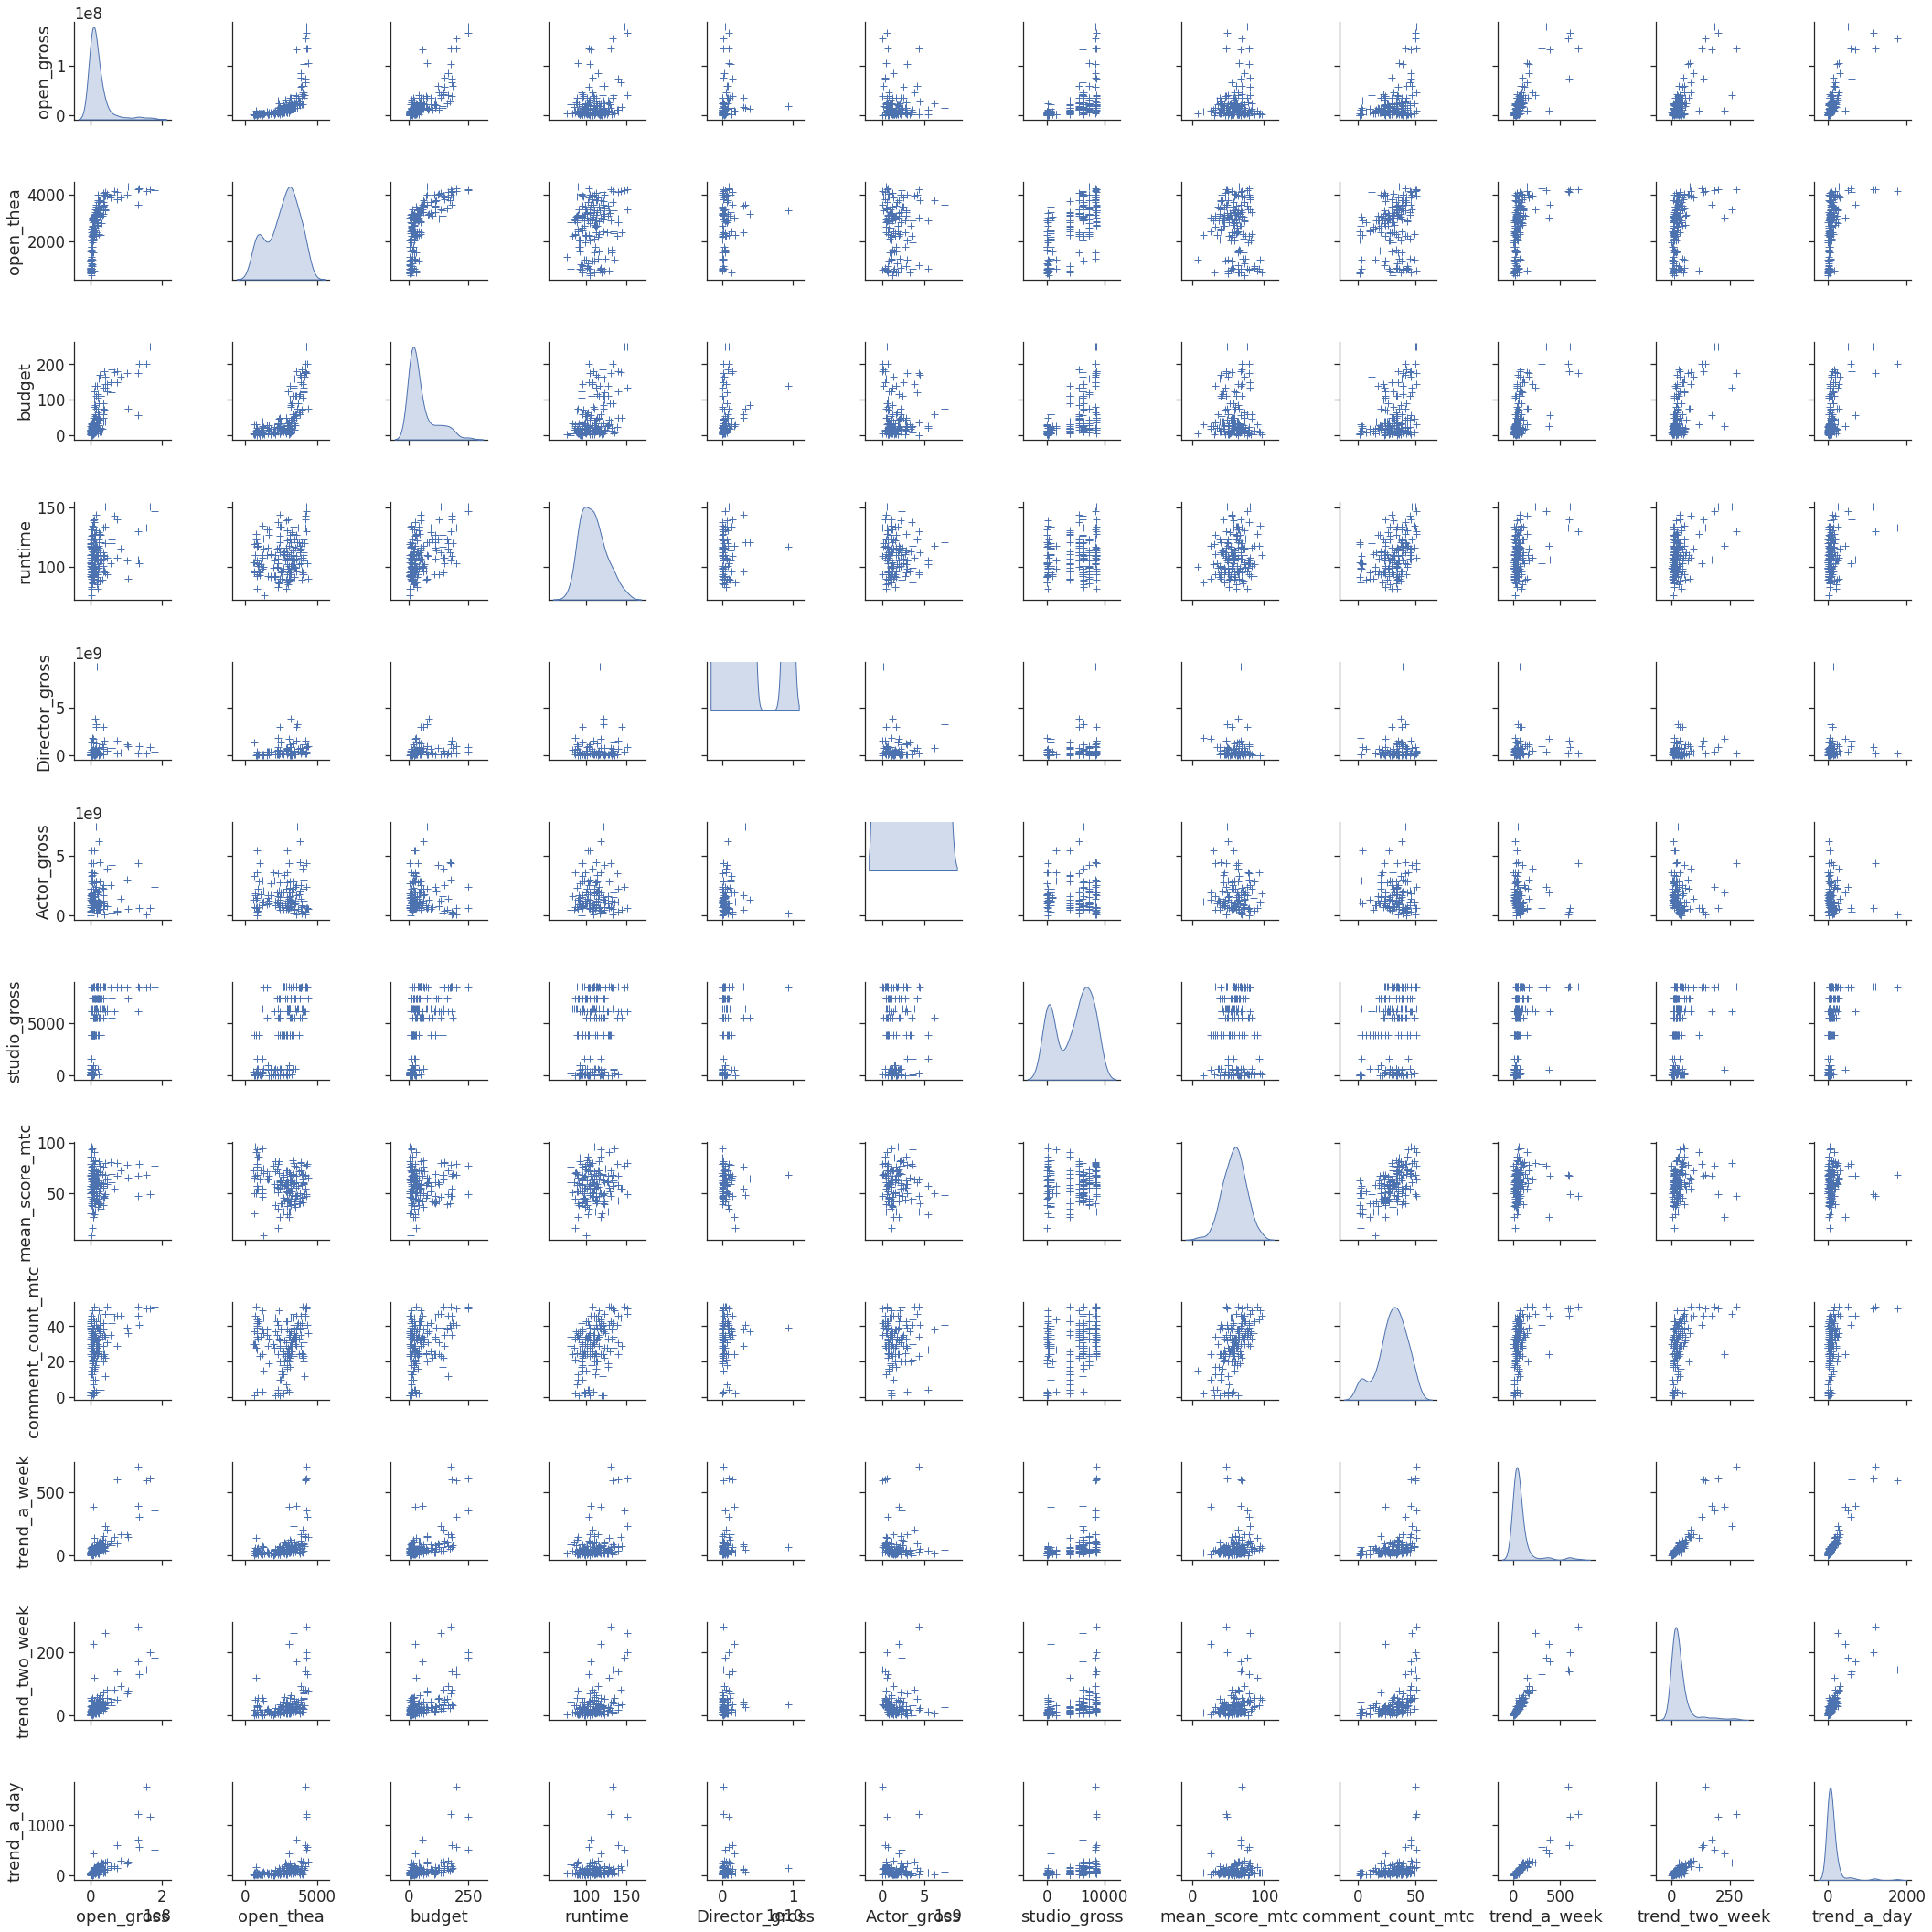

In [ ]:
#pairplot of features
sns.set(style="ticks", color_codes=True, font_scale = 1.5)
df_1 = movie[['open_gross', 'open_thea', 'budget', 'runtime', 'Director_gross', 'Actor_gross', 'studio_gross', 'mean_score_mtc', 'comment_count_mtc', 'trend_a_week', 'trend_two_week', 'trend_a_day']]
sns.pairplot(df_1, diag_kind="kde", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))
plt.show()

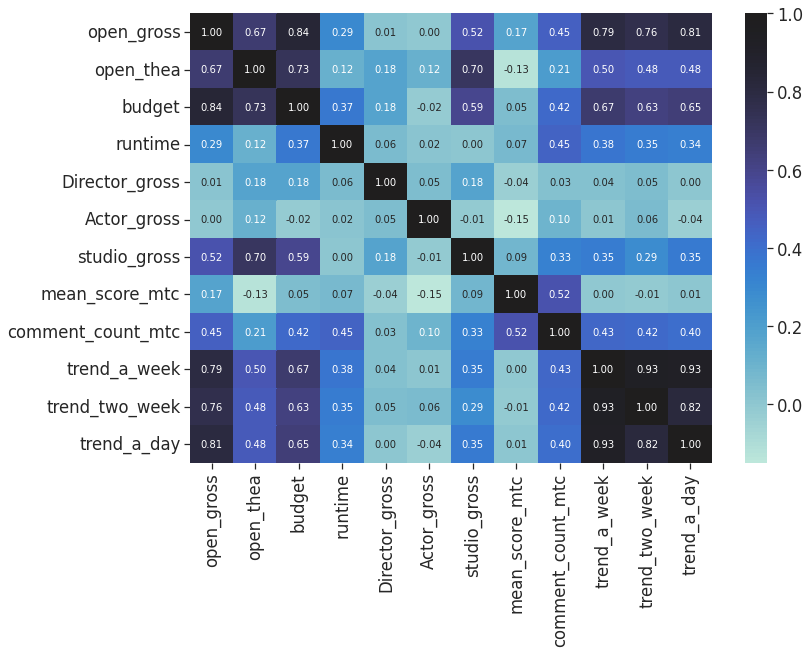

In [ ]:
#correlation matrix of features
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
corrmat = df_1.dropna(axis=0, how='any').corr()
ax = sns.heatmap(corrmat, annot=True, fmt='.2f', annot_kws={'size': 10}, center=1)
plt.show()

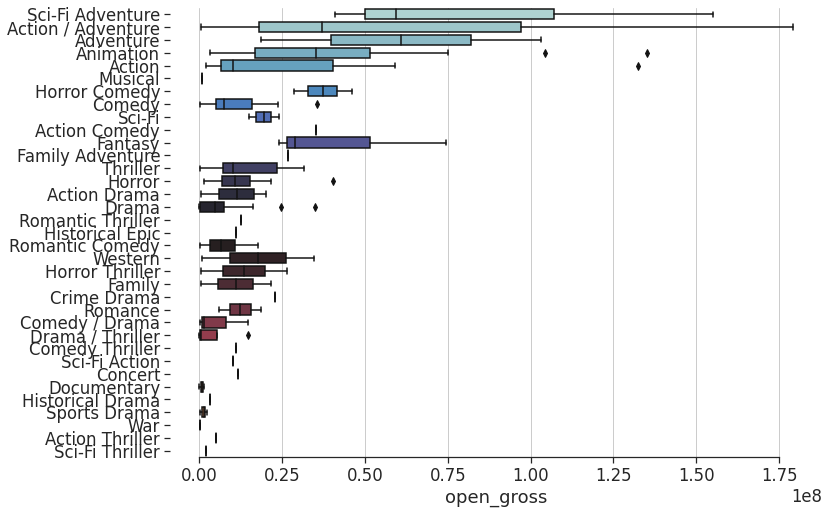

In [ ]:
#Box plot for genres
df0 = pd.read_csv("box2016.csv")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x="open_gross", y="genre", data=df0, palette="icefire")
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)
plt.show()

**Data Cleaning**

In [ ]:
#no.of cells in each feature to see missing values
movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open_gross,165.0,2.141920e+07,3.136284e+07,227354.0000,4.294232e+06,1.111188e+07,2.381734e+07,1.791391e+08
open_thea,165.0,2.603800e+03,1.066413e+03,540.0000,1.945000e+03,2.886000e+03,3.384000e+03,4.370000e+03
budget,165.0,5.051455e+01,5.656766e+01,0.9000,1.000000e+01,2.500000e+01,6.500000e+01,2.500000e+02
runtime,165.0,1.085212e+02,1.556128e+01,76.0000,9.600000e+01,1.070000e+02,1.180000e+02,1.510000e+02
MPAArating,165.0,4.060606e-01,4.925911e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Sci-Fi,165.0,4.242424e-02,2.021686e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Adventure,165.0,1.090909e-01,3.127023e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Action,165.0,1.575758e-01,3.654519e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Animation,165.0,9.696970e-02,2.968173e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Musical,165.0,6.060606e-03,7.784989e-02,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


*For One Day Prediction*

In [ ]:
movie = movie.drop_duplicates()
movie.shape

(165, 36)

In [ ]:
#filling missing values with zero
movie0 = movie.fillna(0)
movie0

,name,open_gross,open_thea,budget,runtime,MPAArating,Sci-Fi,Adventure,Action,Animation,Musical,Comedy,Fantasy,Thriller,Horror,Drama,Romance,Historical,Western,Family,Crime,Concert,Documentary,Sports,War,Director_gross,Actor_gross,studio_gross,mean_score_mtc,comment_count_mtc,trend_a_week,trend_two_week,trend_a_day,hot_season,tier-a-series,strong_competition
0,Rogue One: A Star Wars Story,155081681,4157,200.0,133,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.155474e+08,5.477600e+07,8400.8000,68.240000,50.0,588.760978,144.102337,1758.048514,1,1,0
1,Finding Dory,135060273,4305,200.0,103,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.104761e+08,6.333170e+08,8400.8000,78.878049,41.0,303.511042,130.076161,573.298635,1,1,0
2,Captain America: Civil War,179139142,4226,250.0,147,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.822005e+08,2.343813e+09,8400.8000,77.000000,51.0,350.723871,182.106625,519.341116,1,1,1
3,The Secret Life of Pets,104352905,4370,75.0,90,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.503019e+08,4.942307e+08,7358.0000,64.861111,36.0,145.010831,77.563933,283.276973,1,0,0
4,The Jungle Book (2016),103261464,4028,175.0,105,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.199206e+09,2.981236e+09,8400.8000,78.564103,39.0,165.244901,70.819243,236.064144,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Jane Got a Gun,835572,1210,25.0,98,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.297617e+08,2.911713e+09,1569.5000,50.000000,3.0,4.428571,0.714286,14.000000,0,0,0
161,The Neon Demon,589014,783,7.0,117,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,4.059610e+07,7.067092e+08,34.7000,53.076923,39.0,24.142857,10.571429,47.000000,1,0,1
162,Believe (2016),477387,638,3.5,119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.000000e+00,0.000000e+00,85.7590,30.000000,1.0,0.000000,0.000000,0.000000,1,0,1
163,The Bronze,386328,1167,3.5,108,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,8.244771e+08,314.2000,45.791667,24.0,14.714286,3.714286,32.000000,0,0,1


In [ ]:
movie0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
open_gross,165.0,2.141920e+07,3.136284e+07,227354.0,4.294232e+06,1.111188e+07,2.381734e+07,1.791391e+08
open_thea,165.0,2.603800e+03,1.066413e+03,540.0,1.945000e+03,2.886000e+03,3.384000e+03,4.370000e+03
budget,165.0,5.051455e+01,5.656766e+01,0.9,1.000000e+01,2.500000e+01,6.500000e+01,2.500000e+02
runtime,165.0,1.085212e+02,1.556128e+01,76.0,9.600000e+01,1.070000e+02,1.180000e+02,1.510000e+02
MPAArating,165.0,4.060606e-01,4.925911e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Sci-Fi,165.0,4.242424e-02,2.021686e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Adventure,165.0,1.090909e-01,3.127023e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Action,165.0,1.575758e-01,3.654519e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Animation,165.0,9.696970e-02,2.968173e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Musical,165.0,6.060606e-03,7.784989e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
#selecting input features
list1 = np.array(movie0[['budget',	'runtime',	'MPAArating',	'Sci-Fi',	'Adventure',	'Action',	'Animation',	'Musical',	'Comedy',	'Fantasy',	'Thriller',	'Horror',	'Drama',	'Romance',	'Historical',	'Western',	'Family',	'Crime',	'Concert',	'Documentary',	'Sports',	'War',	'Director_gross',	'Actor_gross',	'studio_gross',	'mean_score_mtc',	'comment_count_mtc', 'trend_a_day',	'hot_season',	'tier-a-series',	'strong_competition']])
moviearrayDay = np.matrix(list1)
moviearrayDay = np.array(moviearrayDay)
print(moviearrayDay)
print(moviearrayDay.shape)

[[200.  133.    0.  ...   1.    1.    0. ]
 [200.  103.    0.  ...   1.    1.    0. ]
 [250.  147.    0.  ...   1.    1.    1. ]
 ...
 [  3.5 119.    0.  ...   1.    0.    1. ]
 [  3.5 108.    1.  ...   0.    0.    1. ]
 [  3.  104.    0.  ...   1.    0.    1. ]]
(165, 31)


In [ ]:
#imputing missing data for director gross and actor gross
for i in range(0,165):
  if moviearrayDay[i][22] == 0:
    if moviearrayDay[i][23] == 0:
      moviearrayDay[i][22] = moviearrayDay[i][23] = (moviearrayDay[i][24] * 2000)
    else:
      moviearrayDay[i][22] = moviearrayDay[i][23]
print(moviearrayDay)

[[200.  133.    0.  ...   1.    1.    0. ]
 [200.  103.    0.  ...   1.    1.    0. ]
 [250.  147.    0.  ...   1.    1.    1. ]
 ...
 [  3.5 119.    0.  ...   1.    0.    1. ]
 [  3.5 108.    1.  ...   0.    0.    1. ]
 [  3.  104.    0.  ...   1.    0.    1. ]]


In [ ]:
moviearrayDay[5]

array([5.80000000e+01, 1.06000000e+02, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.23218000e+07, 1.23218000e+07,
       6.16090000e+03, 6.71086957e+01, 4.60000000e+01, 7.08192431e+02,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [ ]:
#extracting target feature
listtar = np.array(movie0[['open_gross']])
targetD = np.matrix(listtar)
targetD = np.array(targetD)
print(targetD.shape)

(165, 1)


In [ ]:
listtar1 = np.array(movie0[['trend_a_day']])
targetaday = np.matrix(listtar1)
targetaday = np.array(targetaday)
print(targetaday.shape)

(165, 1)


In [ ]:
#dropping outliers
delrow = []
for i in range(165):
  if targetD[i] == 0 and targetaday[i] == 0:
    delrow.append(i)
for i in range(15,-1,-1):
  moviearrayDay = np.delete(moviearrayDay, i, 0)
  targetD = np.delete(targetD, i, 0)
  targetaday = np.delete(targetaday, i, 0)
print(moviearrayDay)
print(moviearrayDay.shape)
print(targetD.shape)
print(targetaday.shape)

[[178.  143.    0.  ...   1.    1.    1. ]
 [125.   94.    0.  ...   1.    0.    1. ]
 [ 30.  128.    0.  ...   1.    0.    0. ]
 ...
 [  3.5 119.    0.  ...   1.    0.    1. ]
 [  3.5 108.    1.  ...   0.    0.    1. ]
 [  3.  104.    0.  ...   1.    0.    1. ]]
(149, 31)
(149, 1)
(149, 1)


*For One Week Prediction*

In [ ]:
#imputing missing values
list1 = np.array(movie0[['budget',	'runtime',	'MPAArating',	'Sci-Fi',	'Adventure',	'Action',	'Animation',	'Musical',	'Comedy',	'Fantasy',	'Thriller',	'Horror',	'Drama',	'Romance',	'Historical',	'Western',	'Family',	'Crime',	'Concert',	'Documentary',	'Sports',	'War',	'Director_gross',	'Actor_gross',	'studio_gross',	'mean_score_mtc',	'comment_count_mtc', 'trend_a_week',	'hot_season',	'tier-a-series',	'strong_competition']])
moviearrayWeek = np.matrix(list1)
moviearrayWeek = np.array(moviearrayWeek)
for i in range(0,165):
  if moviearrayWeek[i][22] == 0:
    if moviearrayWeek[i][23] == 0:
      moviearrayWeek[i][22] = moviearrayWeek[i][23] = (moviearrayWeek[i][24] * 2000)
    else:
      moviearrayWeek[i][22] = moviearrayWeek[i][23]
print(moviearrayWeek)

[[200.  133.    0.  ...   1.    1.    0. ]
 [200.  103.    0.  ...   1.    1.    0. ]
 [250.  147.    0.  ...   1.    1.    1. ]
 ...
 [  3.5 119.    0.  ...   1.    0.    1. ]
 [  3.5 108.    1.  ...   0.    0.    1. ]
 [  3.  104.    0.  ...   1.    0.    1. ]]


In [ ]:
#extracting target feature
listtar13 = np.array(movie0[['open_gross']])
targetW = np.matrix(listtar13)
targetW = np.array(targetW)
print(targetW.shape)

(165, 1)


In [ ]:
listtar12 = np.array(movie0[['trend_a_week']])
targetaweek = np.matrix(listtar12)
targetaweek = np.array(targetaweek)
print(targetaweek.shape)

(165, 1)


In [ ]:
#dropping outliers
delrow1 = []
for i in range(165):
  if targetW[i] == 0 and targetaweek[i] == 0:
    delrow1.append(i)
print(len(delrow1))
for i in range(15,-1,-1):
  moviearrayWeek = np.delete(moviearrayWeek, i, 0)
  targetW = np.delete(targetW, i, 0)
  targetaweek = np.delete(targetaweek, i, 0)
print(moviearrayWeek)
print(moviearrayWeek.shape)
print(targetW.shape)
print(targetaweek.shape)

0
[[178.  143.    0.  ...   1.    1.    1. ]
 [125.   94.    0.  ...   1.    0.    1. ]
 [ 30.  128.    0.  ...   1.    0.    0. ]
 ...
 [  3.5 119.    0.  ...   1.    0.    1. ]
 [  3.5 108.    1.  ...   0.    0.    1. ]
 [  3.  104.    0.  ...   1.    0.    1. ]]
(149, 31)
(149, 1)
(149, 1)


**Model Selection**

No handles with labels found to put in legend.


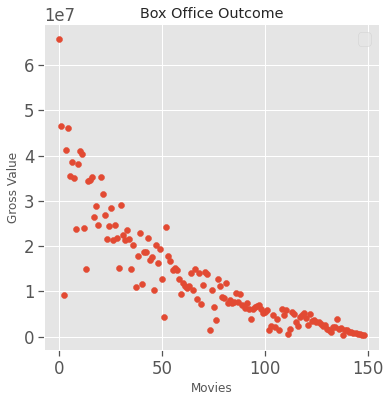

In [ ]:
#splitting data
X_trainD, X_testD, y_trainD, y_testD = train_test_split(moviearrayDay, targetD, test_size = 0.3, random_state = 42)
reScoretr = []
meanSqtr = []
reScorete = []
meanSqte = []
x=list(targetD)
in_index=[x.index(i) for i in targetD]
fig = plt.figure(figsize=(6,6))
plt.style.use('ggplot')
plt.scatter(in_index,targetD)
plt.title("Box Office Outcome")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()

*Linear Regression*

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
LinearModel = linear_model.LinearRegression()

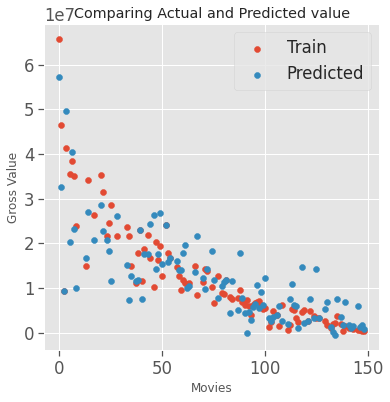

Error:  4037369.0264625154


In [ ]:
y=list(targetD)
test_index=[y.index(i) for i in y_testD]
train_index=[y.index(i) for i in y_trainD]
LinearModel.fit(X_trainD,y_trainD)
fig = plt.figure(figsize=(6,6))
movie_id=train_index
train_open_gross=y_trainD
train_predicted_open_gross=list(LinearModel.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

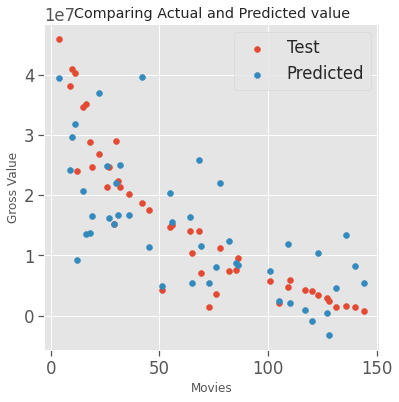

Error:  6739279.384926221


In [ ]:
fig = plt.figure(figsize=(6,6))
movie_id=test_index
test_open_gross=y_testD
test_predicted_open_gross=list(LinearModel.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error 
from sklearn import metrics
expected_y  = y_testD
predicted_y = LinearModel.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
#print(metrics.mean_squared_log_error(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

0.5497938789184467


*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisModel = LogisticRegression(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


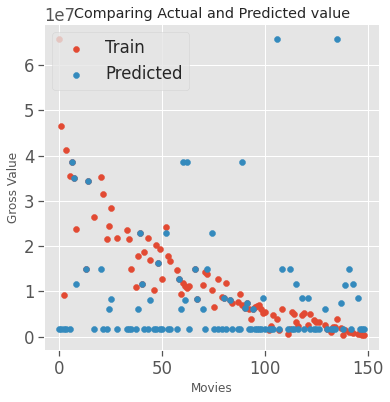

Error:  10040572.125


In [ ]:
y=list(targetD)
test_index=[y.index(i) for i in y_testD]
train_index=[y.index(i) for i in y_trainD]
LogisModel.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
train_open_gross=y_trainD
train_predicted_open_gross=list(LogisModel.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
print("")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

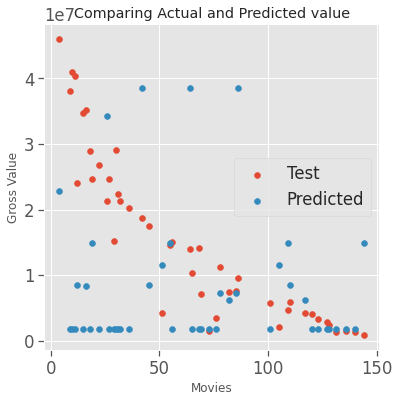

Error:  13237328.333333334


In [ ]:
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(LogisModel.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error and mean sq log error
from sklearn import metrics
expected_y  = y_testD
predicted_y = LogisModel.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

-0.9651138447055678
2.921918696432689


*Huber Regression*

In [ ]:
from sklearn.linear_model import HuberRegressor
alpha_list=np.linspace(0.0001,0.002,20)
result = []
for each in alpha_list:
    hb=HuberRegressor(alpha=each, max_iter=1000)
    scores = cross_val_score(hb, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[[0.0001, -10282321.335212644],
 [0.0002, -10282325.211746277],
 [0.00030000000000000003, -10280336.697254712],
 [0.0004, -10282321.32983744],
 [0.0005, -10280305.255973836],
 [0.0006000000000000001, -10282410.864559304],
 [0.0007000000000000001, -10280348.336356599],
 [0.0008, -10280348.33631579],
 [0.0009000000000000001, -10280334.147759376],
 [0.001, -10282303.15901779],
 [0.0011, -10280351.92958287],
 [0.0012000000000000001, -10279763.050700655],
 [0.0013000000000000002, -10280327.44114514],
 [0.0014000000000000002, -10280424.480729606],
 [0.0015, -10280271.543191275],
 [0.0016, -10282411.653911456],
 [0.0017000000000000001, -10280330.846856203],
 [0.0018000000000000002, -10279872.500563702],
 [0.0019000000000000002, -10280021.981079144],
 [0.002, -10281808.588678595]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


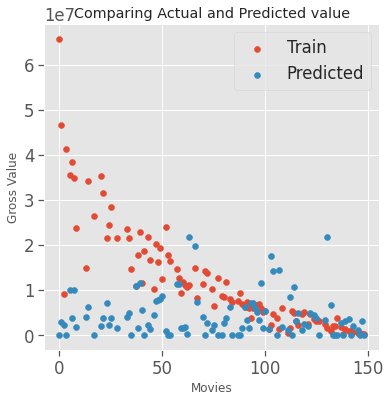

Error:  9938095.851548966


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

y=list(targetD)
test_index=[y.index(i) for i in y_testD]
train_index=[y.index(i) for i in y_trainD]
hb=HuberRegressor(max_iter=1000,alpha=0.0017)
hb.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
train_open_gross=y_trainD
train_predicted_open_gross=list(hb.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

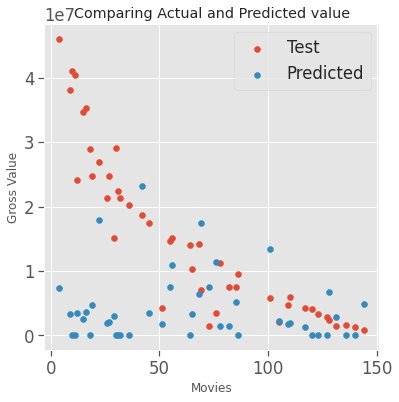

Error:  13281703.868874274


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(hb.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error and mean sq log error
from sklearn import metrics
expected_y  = y_testD
predicted_y = hb.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

-0.9936003223575496
14.712347849436224


*Lasso Regression*

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
alpha_list=np.linspace(0.0001,0.002,20)
result = []
for each in alpha_list:
    lassoreg=Lasso(alpha=each, max_iter=100000)
    scores = cross_val_score(lassoreg, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.0001, -6454695.153655844],
 [0.0002, -6454695.152130088],
 [0.00030000000000000003, -6454695.150604352],
 [0.0004, -6454695.149078582],
 [0.0005, -6454695.147552831],
 [0.0006000000000000001, -6454695.146027099],
 [0.0007000000000000001, -6454695.144501321],
 [0.0008, -6454695.142975619],
 [0.0009000000000000001, -6454695.141449825],
 [0.001, -6454695.1399241015],
 [0.0011, -6454695.138398308],
 [0.0012000000000000001, -6454695.1368725095],
 [0.0013000000000000002, -6454695.135346839],
 [0.0014000000000000002, -6454695.133821057],
 [0.0015, -6454695.132295322],
 [0.0016, -6454695.130769562],
 [0.0017000000000000001, -6454695.129243772],
 [0.0018000000000000002, -6454695.127718027],
 [0.0019000000000000002, -6454695.126192249],
 [0.002, -6454695.1246666135]]

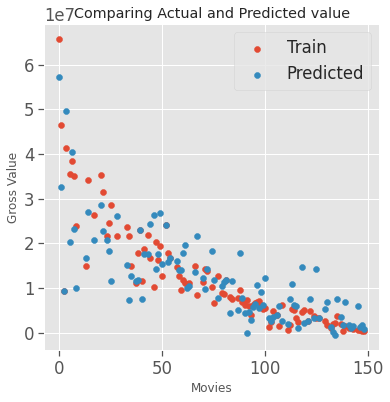

Error:  4037369.0211942564


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

lassoreg=Lasso(alpha=each, max_iter=100000)
lassoreg.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(lassoreg.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

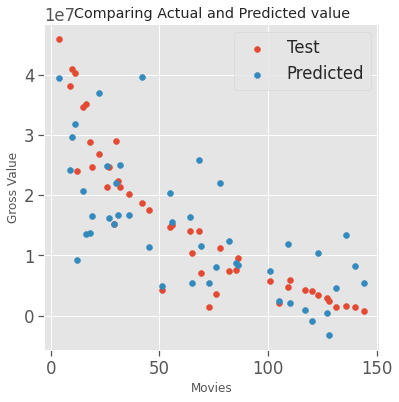

Error:  6739279.331115518


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(lassoreg.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error 
expected_y  = y_testD
predicted_y = lassoreg.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

0.5497938870394795


*Ridge Regression*

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha_list=np.linspace(0.1,1,10)
result = []
for each in alpha_list:
    ri=Ridge(alpha=each, max_iter=100)
    scores = cross_val_score(ri, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.34885e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.54282e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.39103e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.97868e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-condit

[[0.1, -6303284.950950059],
 [0.2, -6200947.60445871],
 [0.30000000000000004, -6118769.222539461],
 [0.4, -6063471.221720283],
 [0.5, -6016010.161575857],
 [0.6, -5974726.2440863475],
 [0.7000000000000001, -5940595.467608946],
 [0.8, -5910140.70354664],
 [0.9, -5882462.785503056],
 [1.0, -5857139.012393697]]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.07945e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


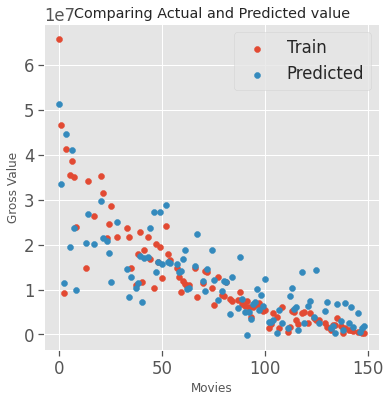

Error:  4270911.076252967


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ri=Ridge(max_iter=100,alpha=1.0)
ri.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(ri.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

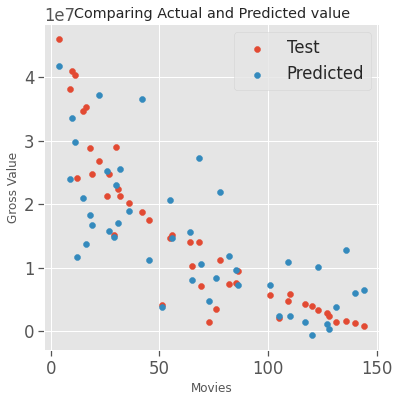

Error:  6110756.808892692


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(ri.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error and mean sq log error
expected_y  = y_testD
predicted_y = ri.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

0.6169989844903514


*Elastic Net Regression*

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

alpha_list=np.linspace(0.01,0.1,10)
result = []
for each in alpha_list:
    elas=ElasticNet(alpha=each, max_iter=100)
    scores = cross_val_score(elas, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+15, tolerance: 9.574e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.389e+15, tolerance: 1.210e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

[[0.01, -6055360.723418854],
 [0.020000000000000004, -5901139.793746814],
 [0.030000000000000006, -5802658.142995341],
 [0.04000000000000001, -5731625.999555717],
 [0.05000000000000001, -5683718.478480888],
 [0.06000000000000001, -5648487.588036233],
 [0.07, -5619394.639329938],
 [0.08, -5602200.300105857],
 [0.09000000000000001, -5591493.985367098],
 [0.1, -5582901.217144366]]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+15, tolerance: 1.389e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


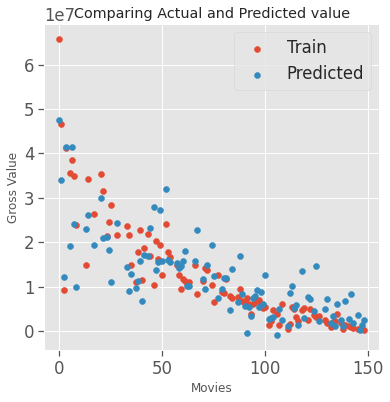

Error:  4424443.019625496


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
elas=ElasticNet(max_iter=100,alpha=0.05)
elas.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(elas.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

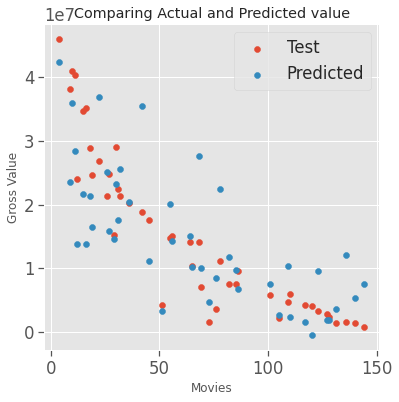

Error:  5781900.694235609


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(elas.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error 
expected_y  = y_testD
predicted_y = elas.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

0.6430681555772828


*Support Vector Machine*

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
alpha_list=np.linspace(0.01,0.1,10)
result = []
for each in alpha_list:
    svr=SVR(tol=each, max_iter=100)
    scores = cross_val_score(svr, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[[0.01, -8314699.428577676],
 [0.020000000000000004, -8314699.428577676],
 [0.030000000000000006, -8314699.428577676],
 [0.04000000000000001, -8314699.428577676],
 [0.05000000000000001, -8314699.428577676],
 [0.06000000000000001, -8314699.428577676],
 [0.07, -8314699.428577676],
 [0.08, -8314699.428577676],
 [0.09000000000000001, -8314699.428577676],
 [0.1, -8314699.428577676]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


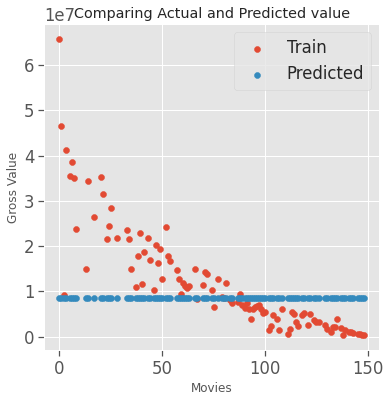

Error:  8190198.105379694


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

svr=SVR(max_iter=100,tol=0.1,kernel = 'rbf')
svr.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(svr.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

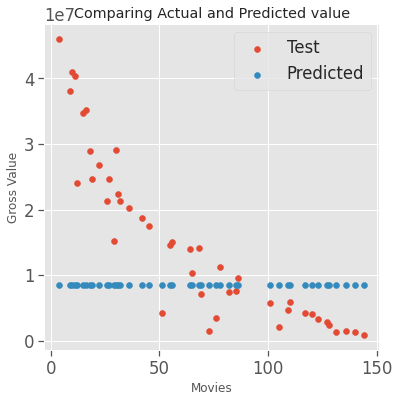

Error:  10851712.182933275


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(svr.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error and mean sq log error
expected_y  = y_testD
predicted_y = svr.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

-0.3004896046603476
1.2051670239223806


*K-Nearest Neighbors*

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    knr = neighbors.KNeighborsRegressor(n_neighbors = K)

    knr.fit(X_trainD, y_trainD)  #fit the model
    pred=knr.predict(X_testD) #make prediction on test set
    error = sqrt(mean_squared_error(y_testD,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 16930589.023624297
RMSE value for k=  2 is: 13547877.30328241
RMSE value for k=  3 is: 12013345.945659818
RMSE value for k=  4 is: 12776225.236236308
RMSE value for k=  5 is: 12228257.101935644
RMSE value for k=  6 is: 12208166.389468258
RMSE value for k=  7 is: 12274443.515319865
RMSE value for k=  8 is: 12409521.204313176
RMSE value for k=  9 is: 12192538.266576234
RMSE value for k=  10 is: 12307797.776756966
RMSE value for k=  11 is: 12271633.736241456
RMSE value for k=  12 is: 12252449.161697766
RMSE value for k=  13 is: 12374615.939582972
RMSE value for k=  14 is: 12414216.190717334
RMSE value for k=  15 is: 12523061.836715871
RMSE value for k=  16 is: 12586581.319551514
RMSE value for k=  17 is: 12463625.60433045
RMSE value for k=  18 is: 12525777.391078413
RMSE value for k=  19 is: 12538146.458823828
RMSE value for k=  20 is: 12592582.024957886


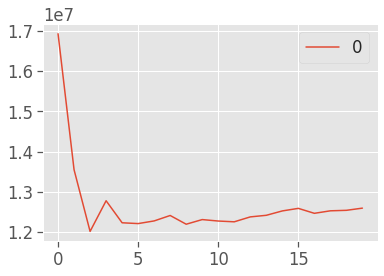

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

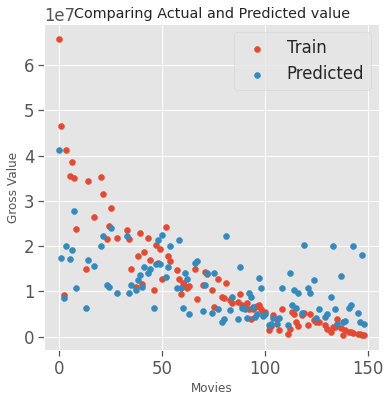

Error:  6251965.147435898


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

knr=neighbors.KNeighborsRegressor(n_neighbors=3, metric='minkowski')
knr.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(knr.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross))

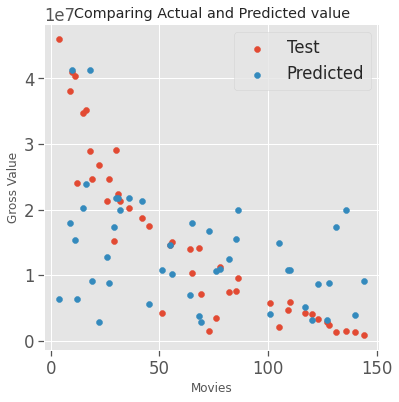

Error:  8960629.444444444


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(knr.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error and mean sq log error
expected_y  = y_testD
predicted_y = knr.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y))

0.08985054924505442
1.2523049789618699


*Multi Layer Perceptron*

In [ ]:
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
alpha_list=np.linspace(0.001,0.1,10)
result = []
for each in alpha_list:
    mlp=MLPRegressor()
    scores = cross_val_score(mlp, X_trainD, y_trainD, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when 

[[0.001, -25695265.022476308],
 [0.012, -38969901.84645978],
 [0.023000000000000003, -22659362.858256083],
 [0.034, -36884981.76268182],
 [0.045000000000000005, -29835716.57532671],
 [0.05600000000000001, -25719174.24977205],
 [0.067, -14041839.108390406],
 [0.07800000000000001, -35499239.692995],
 [0.08900000000000001, -36722203.75977724],
 [0.1, -12771338.515010467]]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


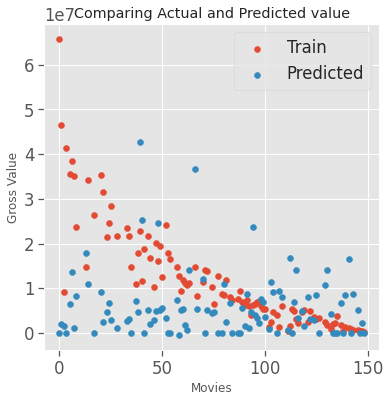

Error:  10454992.5442715


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mlp=MLPRegressor(learning_rate_init=0.05600000000000001)
mlp.fit(X_trainD,y_trainD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=train_index
# movie_id
train_open_gross=y_trainD
train_predicted_open_gross=list(mlp.predict(X_trainD))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(train_open_gross, train_predicted_open_gross))
meanSqtr.append(mean_absolute_error(train_open_gross, train_predicted_open_gross)/3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


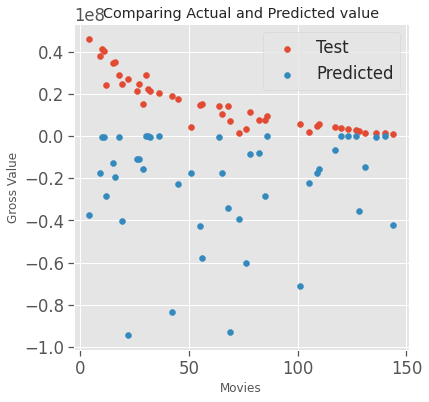

Error:  38252482.36749435


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mlp=MLPRegressor(learning_rate_init=0.05600000000000001)
mlp.fit(X_testD,y_testD)
# setup the figure and axes
fig = plt.figure(figsize=(6,6))
movie_id=test_index
# movie_id
test_open_gross=y_testD
test_predicted_open_gross=list(mlp.predict(X_testD))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.title("Comparing Actual and Predicted value")
plt.xlabel('Movies')
plt.ylabel('Gross Value')
plt.legend()
plt.show()
print("Error: ",mean_absolute_error(test_open_gross, test_predicted_open_gross))
meanSqte.append(mean_absolute_error(test_open_gross, test_predicted_open_gross))

In [ ]:
#Rsq error 
expected_y  = y_testD
predicted_y = mlp.predict(X_testD)
print(metrics.r2_score(expected_y, predicted_y))
reScorete.append(metrics.r2_score(expected_y, predicted_y)/100)

-13.033313757794831


*Comparing Model Accuracy*

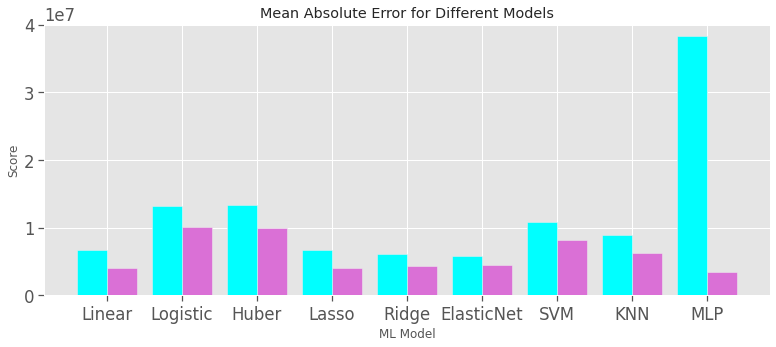

In [ ]:
modelNames = ["Linear", "Logistic", "Huber", "Lasso", "Ridge", "ElasticNet", "SVM", "KNN", "MLP"]
fig = plt.figure(figsize = (13, 5))
X_axis = np.arange(len(modelNames))
plt.bar(X_axis+0.2, meanSqtr, color="orchid", width=0.4, label="Train")
plt.bar(X_axis-0.2, meanSqte, color="cyan", width=0.4, label="Test")
plt.xticks(X_axis, modelNames)
plt.xlabel("ML Model")
plt.ylabel("Score")
plt.title("Mean Absolute Error for Different Models")
plt.show()


In [ ]:
print("Avg Mean Square Error (Linear): ",((meanSqtr[0]+meanSqte[0])/2))
print("Avg Mean Square Error (Lasso): ",((meanSqtr[3]+meanSqte[3])/2))
print("Avg Mean Square Error (Ridge): ",((meanSqtr[4]+meanSqte[4])/2))
print("Avg Mean Square Error (ElasticNet): ",((meanSqtr[5]+meanSqte[5])/2))
errorElas = []
errorNorm = []
errorElas.append(((meanSqtr[4]+meanSqte[4])/2))
errorNorm.append(((meanSqtr[4]+meanSqte[4])/2))

Avg Mean Square Error (Linear):  5388324.205694368
Avg Mean Square Error (Lasso):  5388324.176154887
Avg Mean Square Error (Ridge):  5190833.94257283
Avg Mean Square Error (ElasticNet):  5103171.856930552


**Data Reduction**

*Forward Feature Selection (One Day)*

In [ ]:
#setting params for ffs
classifierDay = LogisticRegression(random_state = 0)
sfsDay = sfs(classifierDay,
           k_features=26,
           forward=True,
           floating=True,
           scoring='accuracy')
sfsDay = sfsDay.fit(moviearrayDay, targetaday)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/

In [ ]:
#selected features
feat_colsDay = list(sfsDay.k_feature_idx_)
print(feat_colsDay)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
#removing unwannted features
newmovieD = np.delete(moviearrayDay, 25, 1)
newmovieD = np.delete(newmovieD, 25, 1)
newmovieD = np.delete(newmovieD, 25, 1)
newmovieD = np.delete(newmovieD, 25, 1)
newmovieD = np.delete(newmovieD, 25, 1)
print(newmovieD)
print(newmovieD.shape)

[[1.780000e+02 1.430000e+02 0.000000e+00 ... 1.232180e+07 6.160900e+03
  1.000000e+00]
 [1.250000e+02 9.400000e+01 0.000000e+00 ... 7.415041e+08 6.160900e+03
  1.000000e+00]
 [3.000000e+01 1.280000e+02 0.000000e+00 ... 5.748994e+08 3.903300e+03
  0.000000e+00]
 ...
 [3.500000e+00 1.190000e+02 0.000000e+00 ... 1.715180e+05 8.575900e+01
  1.000000e+00]
 [3.500000e+00 1.080000e+02 1.000000e+00 ... 8.244771e+08 3.142000e+02
  1.000000e+00]
 [3.000000e+00 1.040000e+02 0.000000e+00 ... 1.640000e+01 8.200000e-03
  1.000000e+00]]
(149, 26)


In [ ]:
#training with new features
X_trainD, X_testD, y_trainD, y_testD = train_test_split(newmovieD, targetD, test_size = 0.3, random_state = 0)
print(X_testD.shape)
classifier1Day = ElasticNet(alpha=each, max_iter=100)
classifier1Day.fit(X_trainD, y_trainD)
y_predD = classifier1Day.predict(X_testD)

(45, 26)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+15, tolerance: 1.638e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


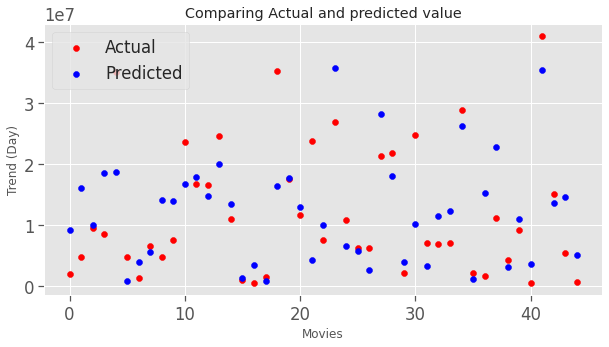

In [ ]:
#visualizing prediction
x_axis=[]
for i in range (0,45):
  x_axis.append(i)
fig = plt.figure(figsize = (10, 5))
plt.scatter(x_axis, y_testD, color = 'red')
plt.scatter(x_axis, y_predD, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Trend (Day)')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
#error evaluation
print("Error (FFS Day): ",mean_absolute_error(y_testD, y_predD))
errorElas.append(mean_absolute_error(y_testD, y_predD))

Error (FFS Day):  5441363.556929236


*Forward Feature Selection (One Week)*

In [ ]:
#setting params for ffs
classifierWeek = LogisticRegression(random_state = 0)
sfsWeek = sfs(classifierWeek,
           k_features=26,
           forward=True,
           scoring='accuracy')
sfsWeek = sfsWeek.fit(moviearrayWeek, targetaweek)

Streaming output truncated to the last 5000 lines.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1516, in fit
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/multiclass.py", line 198, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

In [ ]:
#selected features
feat_colsWeek = list(sfsWeek.k_feature_idx_)
print(feat_colsWeek)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


In [ ]:
#removing unwanted features
newmovieW = np.delete(moviearrayWeek, 25, 1)
newmovieW = np.delete(newmovieW, 25, 1)
newmovieW = np.delete(newmovieW, 25, 1)
newmovieW = np.delete(newmovieW, 25, 1)
newmovieW = np.delete(newmovieW, 25, 1)
print(newmovieW)
print(newmovieW.shape)

[[1.780000e+02 1.430000e+02 0.000000e+00 ... 1.232180e+07 6.160900e+03
  1.000000e+00]
 [1.250000e+02 9.400000e+01 0.000000e+00 ... 7.415041e+08 6.160900e+03
  1.000000e+00]
 [3.000000e+01 1.280000e+02 0.000000e+00 ... 5.748994e+08 3.903300e+03
  0.000000e+00]
 ...
 [3.500000e+00 1.190000e+02 0.000000e+00 ... 1.715180e+05 8.575900e+01
  1.000000e+00]
 [3.500000e+00 1.080000e+02 1.000000e+00 ... 8.244771e+08 3.142000e+02
  1.000000e+00]
 [3.000000e+00 1.040000e+02 0.000000e+00 ... 1.640000e+01 8.200000e-03
  1.000000e+00]]
(149, 26)


In [ ]:
#training with new features
X_trainW, X_testW, y_trainW, y_testW = train_test_split(newmovieW, targetW, test_size = 0.3, random_state = 0)
classifier1Week = ElasticNet(alpha=each, max_iter=100)
classifier1Week.fit(X_trainW, y_trainW)
y_predW = classifier1Week.predict(X_testW)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.407e+15, tolerance: 1.638e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


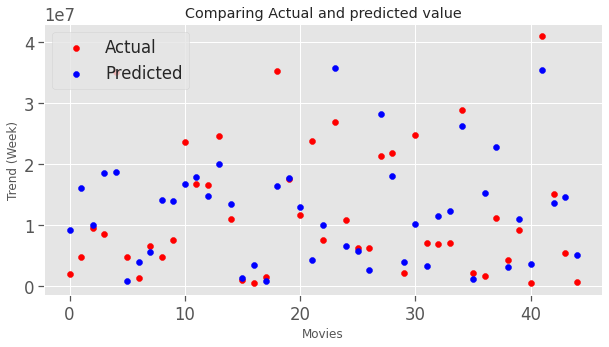

In [ ]:
#visualizaing predictions
fig = plt.figure(figsize = (10, 5))
plt.scatter(x_axis, y_testW, color = 'red')
plt.scatter(x_axis, y_predW, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Trend (Week)')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
#error evaluation
print("Error (FFS Week): ",mean_absolute_error(y_testW, y_predW))

Error (FFS Week):  5441363.556929236


*Backward Feature Reduction (One Day)*

In [ ]:
#setting params for bfr
classifierBD = LogisticRegression(random_state = 0)
sfs11D = sfs(classifierBD,
           k_features=26,
           forward=False,
           scoring='accuracy')
sfs11D = sfs11D.fit(moviearrayDay, targetaday)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#selected features
feat_cols1BD = list(sfs11D.k_feature_idx_)
print(feat_cols1BD)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


*Backward Feature Reduction (One Week)*

In [ ]:
#setting params for bfr
classifierBW = LogisticRegression(random_state = 0)
sfs11W = sfs(classifierBD,
           k_features=26,
           forward=False,
           scoring='accuracy')
sfs11W = sfs11W.fit(moviearrayWeek, targetaweek)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#selected features
feat_cols1BW = list(sfs11W.k_feature_idx_)
print(feat_cols1BW)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]


*Principal Component Analysis (One Day)*

In [ ]:
#setting params for pca
X_train, X_test, y_train, y_test = train_test_split(moviearrayDay, targetD, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 
pca = PCA(n_components = 25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_test.shape)
print(y_test.shape)

(45, 25)
(45, 1)


In [ ]:
#training with new input
classifier1W = ElasticNet(alpha=each, max_iter=100)
classifier1W.fit(X_train, y_train)
y_pred1 = classifier1W.predict(X_test)

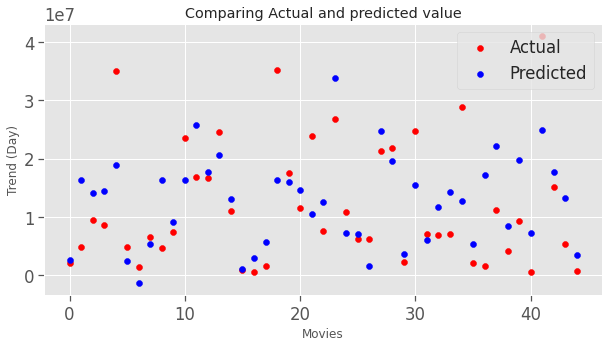

In [ ]:
#visualizing predictions
x_axis=[]
for i in range (0,45):
  x_axis.append(i)
fig = plt.figure(figsize = (10, 5))
plt.scatter(x_axis, y_test, color = 'red')
plt.scatter(x_axis, y_pred1, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Trend (Day)')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
#error evaluation
print("Error (PCA Day): ",mean_absolute_error(y_test, y_pred1))
errorElas.append(mean_absolute_error(y_test, y_pred1))

Error (PCA Day):  6048731.402273739


In [ ]:
#Comparing different models after PCA for one Day
es = ElasticNet(alpha=each, max_iter=1000)
es.fit(X_train, y_train)
y_pred1 = es.predict(X_test)
print("Elastic Net Error (PCA Day): ",mean_absolute_error(y_test, y_pred1))
hs = HuberRegressor(alpha=each, max_iter=1000)
hs.fit(X_train, y_train)
y_pred1 = hs.predict(X_test)
print("Huber Regressor Error (PCA Day): ",mean_absolute_error(y_test, y_pred1))
ls = Lasso(alpha=each, max_iter=1000)
ls.fit(X_train, y_train)
y_pred1 = ls.predict(X_test)
print("Lasso Error (PCA Day): ",mean_absolute_error(y_test, y_pred1))
ri = Ridge(alpha=each, max_iter=1000)
ri.fit(X_train, y_train)
y_pred1 = ri.predict(X_test)
print("Ridge Error (PCA Day): ",mean_absolute_error(y_test, y_pred1))
print("")

Elastic Net Error (PCA Day):  6048731.402273739
Huber Regressor Error (PCA Day):  8317104.565981877
Lasso Error (PCA Day):  6156546.37953511
Ridge Error (PCA Day):  6154068.055171493



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Principal Component Analysis (One Week)*

In [ ]:
#setting params for PCA
X_train1, X_test1, y_train1, y_test1 = train_test_split(moviearrayWeek, targetW, test_size = 0.3, random_state = 0)

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)
 
pca = PCA(n_components = 25)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

print(X_test1.shape)
print(y_test1.shape)

(45, 25)
(45, 1)


In [ ]:
#training with new input
classifier11W = ElasticNet(alpha=each, max_iter=100)
classifier11W.fit(X_train1, y_train1)
y_pred11 = classifier11W.predict(X_test1)

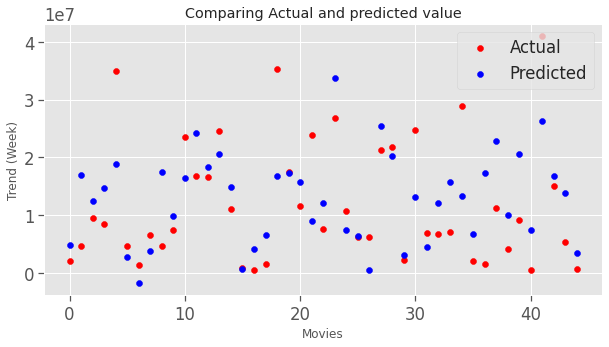

In [ ]:
#visualizing predictions
fig = plt.figure(figsize = (10, 5))
plt.scatter(x_axis, y_test1, color = 'red')
plt.scatter(x_axis, y_pred11, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Trend (Week)')
plt.legend(['Actual', 'Predicted'])
plt.show()

In [ ]:
#error evaluation
print("Error (PCA Week): ",mean_absolute_error(y_test1, y_pred11))

Error (PCA Week):  6410345.643703526


In [ ]:
#Comparing different models after PCA for one week
es = ElasticNet(alpha=each, max_iter=1000)
es.fit(X_train1, y_train1)
y_pred11 = es.predict(X_test1)
print("Elastic Net Error (PCA Week): ",mean_absolute_error(y_test1, y_pred11))
hs = HuberRegressor(alpha=each, max_iter=1000)
hs.fit(X_train1, y_train1)
y_pred11 = hs.predict(X_test1)
print("Huber Regressor Error (PCA Week): ",mean_absolute_error(y_test1, y_pred11))
ls = Lasso(alpha=each, max_iter=1000)
ls.fit(X_train1, y_train1)
y_pred11 = ls.predict(X_test1)
print("Lasso Error (PCA Week): ",mean_absolute_error(y_test1, y_pred11))
ri = Ridge(alpha=each, max_iter=1000)
ri.fit(X_train1, y_train1)
y_pred11 = ri.predict(X_test1)
print("Ridge Error (PCA Week): ",mean_absolute_error(y_test1, y_pred11))
print("")

Elastic Net Error (PCA Week):  6410345.643703526
Huber Regressor Error (PCA Week):  8317196.025027893
Lasso Error (PCA Week):  6558239.472863214
Ridge Error (PCA Week):  6554916.656009078



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Comparing Data Reduction Algorithm Accuracy*

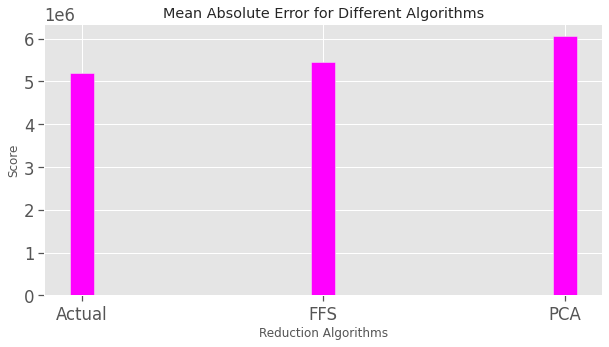

In [ ]:
#comparing accuracy
reductionNames = ["Actual", "FFS", "PCA"]
fig = plt.figure(figsize = (10, 5))
plt.bar(reductionNames, errorElas, color="magenta", width=0.1)
plt.xlabel("Reduction Algorithms")
plt.ylabel("Score")
plt.title("Mean Absolute Error for Different Algorithms")
plt.show()

In [ ]:
#all errors
print(errorElas)

[5190833.94257283, 5441363.556929236, 6048731.402273739]


**Data Transformation**

*Normalization*

In [ ]:
#Using Normalize
from sklearn import preprocessing
normalized_arrD = []
for i in moviearrayDay:
  x_array = i 
  n_arr = preprocessing.normalize([x_array])
  normalized_arrD.append(n_arr.flatten().tolist())
normalized_arrD = np.array(normalized_arrD)
print(normalized_arrD)
print(normalized_arrD.shape)

[[1.02148224e-05 8.20628994e-06 0.00000000e+00 ... 5.73866429e-08
  5.73866429e-08 5.73866429e-08]
 [1.19201428e-07 8.96394739e-08 0.00000000e+00 ... 9.53611425e-10
  0.00000000e+00 9.53611425e-10]
 [3.68989834e-08 1.57435663e-07 0.00000000e+00 ... 1.22996611e-09
  0.00000000e+00 0.00000000e+00]
 ...
 [1.44292334e-05 4.90593937e-04 0.00000000e+00 ... 4.12263813e-06
  0.00000000e+00 4.12263813e-06]
 [3.00174951e-09 9.26254136e-08 8.57642718e-10 ... 0.00000000e+00
  0.00000000e+00 8.57642718e-10]
 [2.53817972e-02 8.79902305e-01 0.00000000e+00 ... 8.46059908e-03
  0.00000000e+00 8.46059908e-03]]
(149, 31)


In [ ]:
#error evaluation
X_trainN1, X_testN1, y_trainN1, y_testN1 = train_test_split(normalized_arrD, targetD, test_size = 0.3, random_state = 0)
classifierN1D = ElasticNet(alpha=each, max_iter=100)
classifierN1D.fit(X_trainN1, y_trainN1)
y_predN1D = classifierN1D.predict(X_testN1)
print("Error (Norm Day): ",mean_absolute_error(y_testN1, y_predN1D))
errorNorm.append(mean_absolute_error(y_testN1, y_predN1D))

Error (Norm Day):  9095574.270953406


In [ ]:
#Comparing different models after Normalization
es = ElasticNet(alpha=each, max_iter=1000)
es.fit(X_trainN1, y_trainN1)
y_predN1D = es.predict(X_testN1)
print("Elastic Net Error (Normalized): ",mean_absolute_error(y_testN1, y_predN1D))
hs = HuberRegressor(alpha=each, max_iter=1000)
hs.fit(X_trainN1, y_trainN1)
y_predN1D = hs.predict(X_testN1)
print("Huber Regressor Error (Normalized): ",mean_absolute_error(y_testN1, y_predN1D))
ls = Lasso(alpha=each, max_iter=1000)
ls.fit(X_trainN1, y_trainN1)
y_predN1D = ls.predict(X_testN1)
print("Lasso Error (Normalized): ",mean_absolute_error(y_testN1, y_predN1D))
ri = Ridge(alpha=each, max_iter=1000)
ri.fit(X_trainN1, y_trainN1)
y_predN1D = ri.predict(X_testN1)
print("Ridge Error (Normalized): ",mean_absolute_error(y_testN1, y_predN1D))
print("")

Elastic Net Error (Normalized):  9095574.270953406
Huber Regressor Error (Normalized):  8318203.723165637
Lasso Error (Normalized):  9535191.4937538
Ridge Error (Normalized):  9145644.682665506



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.506e+15, tolerance: 1.638e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


*Min Max*

In [ ]:
#Using MinMaxScaler
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
minmax_normalizedD = scaler.fit_transform(moviearrayDay)
print(minmax_normalizedD)
print(minmax_normalizedD.shape)

[[0.98883305 0.98529412 0.         ... 1.         1.         1.        ]
 [0.69290899 0.26470588 0.         ... 1.         0.         1.        ]
 [0.16247906 0.76470588 0.         ... 1.         0.         0.        ]
 ...
 [0.01451703 0.63235294 0.         ... 1.         0.         1.        ]
 [0.01451703 0.47058824 1.         ... 0.         0.         1.        ]
 [0.01172529 0.41176471 0.         ... 1.         0.         1.        ]]
(149, 31)


In [ ]:
#error evaluation
X_trainN2, X_testN2, y_trainN2, y_testN2 = train_test_split(minmax_normalizedD, targetD, test_size = 0.3, random_state = 0)
classifierN1W = ElasticNet(alpha=each, max_iter=100)
classifierN1W.fit(X_trainN2, y_trainN2)
y_predN2D = classifierN1D.predict(X_testN2)
print("Error (Min Max Day): ",mean_absolute_error(y_testN2, y_predN2D))
errorNorm.append(mean_absolute_error(y_testN2, y_predN2D))

Error (Min Max Day):  8160662.938000422


In [ ]:
#Comparing different models after MinMax
es = ElasticNet(alpha=each, max_iter=1000)
es.fit(X_trainN2, y_trainN2)
y_predN2D = es.predict(X_testN2)
print("Elastic Net Error (MinMax): ",mean_absolute_error(y_testN2, y_predN2D))
hs = HuberRegressor(alpha=each, max_iter=1000)
hs.fit(X_trainN2, y_trainN2)
y_predN2D = hs.predict(X_testN2)
print("Huber Regressor Error (MinMax): ",mean_absolute_error(y_testN2, y_predN2D))
ls = Lasso(alpha=each, max_iter=1000)
ls.fit(X_trainN2, y_trainN2)
y_predN2D = ls.predict(X_testN2)
print("Lasso Error (MinMax): ",mean_absolute_error(y_testN2, y_predN2D))
ri = Ridge(alpha=each, max_iter=1000)
ri.fit(X_trainN2, y_trainN2)
y_predN2D = ri.predict(X_testN2)
print("Ridge Error (MinMax): ",mean_absolute_error(y_testN2, y_predN2D))
print("")

Elastic Net Error (MinMax):  6223552.076799016
Huber Regressor Error (MinMax):  8318103.370781109
Lasso Error (MinMax):  5684335.952316229
Ridge Error (MinMax):  5683674.129565735



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*Comparing Data Transformation Algorithm Accuracy*

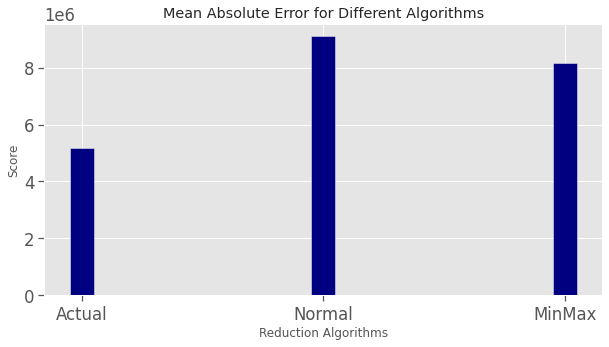

In [ ]:
#comparing errors
reductionNames = ["Actual", "Normal", "MinMax"]
fig = plt.figure(figsize = (10, 5))
plt.bar(reductionNames, errorNorm, color="navy", width=0.1)
plt.xlabel("Reduction Algorithms")
plt.ylabel("Score")
plt.title("Mean Absolute Error for Different Algorithms")
plt.show()

In [ ]:
#all errors
print(errorNorm)

[5190833.94257283, 9095574.270953406, 8160662.938000422]


**Results**

*One Day Prediction*

In [ ]:
#training for one day
X_trainDay, X_testDay, y_trainDay, y_testDay = train_test_split(moviearrayDay, targetD, test_size = 0.3, random_state = 0)
DayElas = ElasticNet(max_iter=100,alpha=0.05)
DayElas.fit(X_trainDay,y_trainDay)
DayPrediction = DayElas.predict(X_testDay)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.276e+15, tolerance: 1.638e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


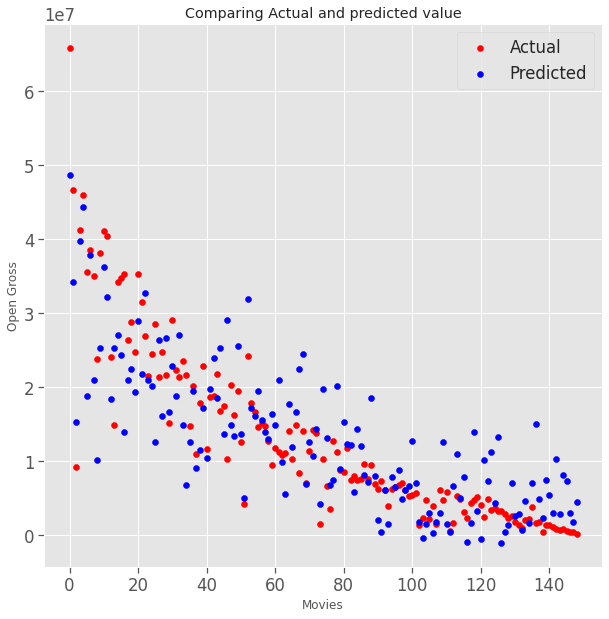

In [ ]:
#visualizing predictions for one day
DayPred = DayElas.predict(moviearrayDay)
x_input = []
for i in range(149):
  x_input.append(i)
fig = plt.figure(figsize = (10, 10))
plt.scatter(x_input, targetD, color = 'red')
plt.scatter(x_input, DayPred, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Open Gross')
plt.legend(['Actual', 'Predicted'])
plt.show()

*One Week Predictions* 

In [ ]:
#training for one week
X_trainWeek, X_testWeek, y_trainWeek, y_testWeek = train_test_split(moviearrayWeek, targetW, test_size = 0.3, random_state = 0)
WeekElas = ElasticNet(max_iter=100,alpha=0.05)
WeekElas.fit(X_trainWeek,y_trainWeek)
WeekPrediction = WeekElas.predict(X_testWeek)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.410e+15, tolerance: 1.638e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


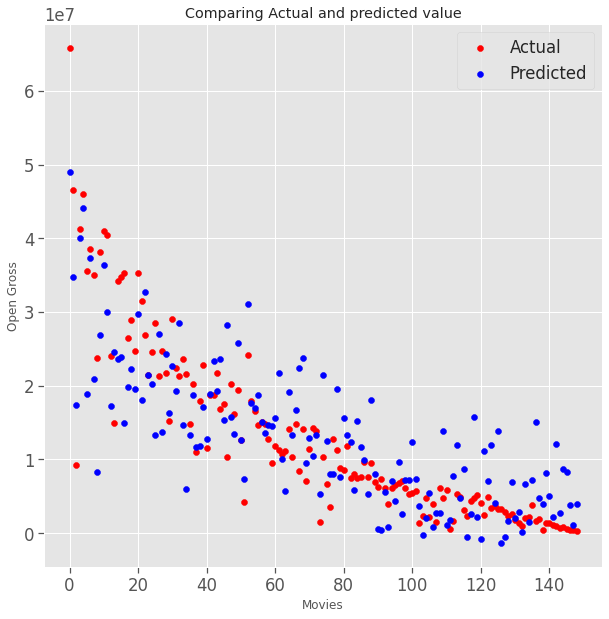

In [ ]:
#Visualizing predictions for one week 
WeekPred = WeekElas.predict(moviearrayWeek)
fig = plt.figure(figsize = (10, 10))
plt.scatter(x_input, targetW, color = 'red')
plt.scatter(x_input, WeekPred, color = 'blue')
plt.title("Comparing Actual and predicted value")
plt.xlabel('Movies')
plt.ylabel('Open Gross')
plt.legend(['Actual', 'Predicted'])
plt.show()

*Accuracy for both Predictions*

In [ ]:
#Accuracy Score
print("Accuracy for One Day Prediction: ", round((DayElas.score(X_testDay,y_testDay))*100),"%")
print("Accuracy for One Week Prediction: ", round((WeekElas.score(X_testWeek,y_testWeek))*100),"%")

Accuracy for One Day Prediction:  60 %
Accuracy for One Week Prediction:  55 %


In [ ]:
#Mean Abs error and R Sq error
print("Mean Abs Error for One Day Prediction: ", round(mean_absolute_error(targetD,DayPred)))
print("Mean Abs Error for One Week Prediction: ", round(mean_absolute_error(targetW,WeekPred)))
print("\nR Sq Error for One Day Prediction: ", round(r2_score(targetD,DayPred)))
print("R Sq Error for One Week Prediction: ", round(r2_score(targetW,WeekPred)))

Mean Abs Error for One Day Prediction:  4823914
Mean Abs Error for One Week Prediction:  5112684

R Sq Error for One Day Prediction:  1
R Sq Error for One Week Prediction:  1


In [ ]:
#Predicting for testcases
print("Predicting movie's gross value one day after release")
tar1=targetD[56]
tar2=targetD[92]
print("\nTest Case 1:")
print("Actual Value: $", (tar1[0]))
print("Predicted Value: $", DayPred[56])
print("\nTest Case 2:")
print("Actual Value: $", (tar2[0]))
print("Predicted Value: $", DayPred[92])
print("\nPredicting movie's gross value one week after release")
tar3=targetW[56]
tar4=targetW[92]
print("\nTest Case 1:")
print("Actual Value: $", (tar3[0]))
print("Predicted Value: $", WeekPred[56])
print("\nTest Case 2:")
print("Actual Value: $", (tar4[0]))
print("Predicted Value: $", WeekPred[92])

Predicting movie's gross value one day after release

Test Case 1:
Actual Value: $ 15134235
Predicted Value: $ 15591716.621685212

Test Case 2:
Actual Value: $ 6050443
Predicted Value: $ 6133586.335548041

Predicting movie's gross value one week after release

Test Case 1:
Actual Value: $ 15134235
Predicted Value: $ 15048411.794285445

Test Case 2:
Actual Value: $ 6050443
Predicted Value: $ 5527258.207393287
